<a href="https://colab.research.google.com/github/DAI3862/DNN/blob/main/Day5/FIFA_wip_torch_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Introduction to Pytorch
## FIFA dataset

<img src='https://github.com/DAI3862/DNN/images/prasami_color_tutorials_small.png?raw=1' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [10]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, r'G:\My Drive\DNN')
from collections.abc import Callable
from typing import Literal

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

# from utils.helper import fn_plot_torch_hist, fn_plot_confusion_matrix

In [11]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# By Pramod Sharma : pramod.sharma@prasami.com

###-----------------
### Import Libraries
###-----------------

import os
import datetime
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




# verify if the directory exists
def fn_dir_exists(_dir):
    '''
    Args:
    	_dir: path if a directory
     '''

    res = os.path.exists(_dir)

    fn_log_event ('-- Directory "{}" exist : {}'.format(_dir, res), 'debug')

    if not res:

        fn_log_event ('-- Directory "{}" does not exists.'.format(_dir), 'debug')

        sys.exit('-- Directory "{}" does not exists.'.format(_dir))

    return res



def fn_file_exists(_file):
    '''
        verify if the file exists
    '''
    res = os.path.exists(_file)

    fn_log_event ('-- File "{}" exist : {}'.format(_file, res), 'debug')

    if not res:

        fn_log_event ('-- File "{}" does not exists.'.format(_file), 'debug')

        sys.exit('-- File "{}" does not exists.'.format(_file))

    return res


###-----------------------------
### Verify or create a directory
###-----------------------------
def fn_verify_dir(_path : str):
    '''
    Arg:
        path: path to verify the directory
    returns:
        create dir if it does not exists
    '''
    if os.path.exists(_path): # check if the path exists. Maybe a file or a folder

        print(_path, ' exists') # advised the user

    else:

        os.makedirs(_path) # create the path

        print("Created folder : ", _path)

###------------------------------------------------
### Plot Loss Curve using Tensorflow history object
###------------------------------------------------
def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: loss
            column 1: accuracy
            column 2: val_loss
            column 3: val_accuracy
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y3] == hist_df[y3].min()]

    ax = axes[0]

    hist_df.plot(y = [y1,y3], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid();
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y2, y4], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.grid()
    ax.legend(loc = 'lower left')

    plt.tight_layout()



###------------------------------
### Plot Loss Curve using pytorch
###------------------------------
def fn_plot_torch_hist(hist_df):

    # instantiate figure
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)

    # columns
    x = hist_df.columns[0]
    y1 = hist_df.columns[1]
    y2 = hist_df.columns[2]
    y3 = hist_df.columns[3]
    y4 = hist_df.columns[4]

    # Where was min loss
    best = hist_df[hist_df[y2] == hist_df[y2].min()]
    best = best.drop_duplicates(subset=y2)
    # pick first axis
    ax = axes[0]

    # Plot all losses
    hist_df.plot(x = x, y = [y1, y2], ax = ax)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y2].min())
    y_max = max(hist_df[y1].max(), hist_df[y2].max())
    offset = (y_max-y_min)/10.0

    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y2]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y2].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y2].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()+ offset, best[y2].to_numpy()[0]+offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best[x].to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel(x.title())
    ax.set_ylabel(y1.title())
    ax.set_title('Errors')
    ax.grid()
    ax.legend(loc = 'upper left') # model legend to upper left

    # pick second axis
    ax = axes[1]

    # Plot accuracies
    hist_df.plot(x = x, y = [y3, y4], ax = ax)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y3],
                           hist_df.iloc[-1][y4]) #text to plot

    # calculate offset for arroe
    y_min = min(hist_df[y3].min(), hist_df[y4].min())
    y_max = max(hist_df[y3].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # place a text box in lower middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()- offset, best[y4].to_numpy()[0]-offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow


    # Draw a vertical line at best value
    ax.axvline(x = best[x].to_numpy(),
               color = 'green',
               linestyle='-.', lw = 3)

    # Labels
    ax.set_xlabel(x.title())
    ax.set_ylabel(y3.title())
    ax.set_title('Accuracies')
    ax.grid();
    ax.legend(loc = 'lower left')

    plt.tight_layout()



###---------------------------------------------------
### Plot count of classes in training and testing sets
###---------------------------------------------------
def fn_plot_labels(tr_ds, ts_ds, class_names = None):

    '''
        Args:
            tr_ds :  Training Dataset
            ts_ds : Testing dataset
        Returns : none
    '''

    # create figure and axes
    fig, axes = plt.subplots(1,2, figsize = (15,5))

    # get names of the classes
    if not class_names:
        tr_class_names = tr_ds.class_names
        ts_class_names = tr_ds.class_names

    # pick first axis
    ax = axes[0]

    # create dict of training labels
    class_counts = {}
    for imgs, lbls in tr_ds:
        for lbl in lbls.numpy():
            class_counts[lbl] = class_counts.get(lbl, 0) +1

    # bar plot
    ax.bar(tr_class_names, [class_counts.get(i, 0) for i in range(len(tr_class_names))],
           align='center',color = 'DarkBlue', alpha = 0.7)

    # add title
    ax.set_title('Training Set')

    # grids make it look good
    ax.grid()


    #pick second image
    ax = axes[1]

    # create dict of training labels
    class_counts = {}
    for imgs, lbls in ts_ds:
        for lbl in lbls.numpy():
            class_counts[lbl] = class_counts.get(lbl, 0) +1

    # bar plot
    ax.bar(ts_class_names, [class_counts.get(i, 0) for i in range(len(ts_class_names))],
           align='center',color = 'orange', alpha = 0.7)

    # add title
    ax.set_title('Test Set')


    # grids make it look good
    ax.grid()

    # fit the subplot(s) in to the figure area
    plt.tight_layout()

    # display all open figures
    plt.show()

def fn_convert_timestamp(tstr):
    '''
        Function to conver string of form "2015-11-12 1444"
    '''

    return datetime.strptime(tstr, "%Y-%m-%d_%H%M")

###----------------------
### Plot confusion matrix
###----------------------
def fn_plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Args:
        y_true: Ground Truth
        y_pred : Predictions
        labels : dictonary
                  {0: 'Goal Keeper',
                  1: 'Defender',
                  2: 'Mid-Fielder',
                  3: 'Forward'}

    '''

    cm  = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels.values())

    fig, ax = plt.subplots(figsize = (6,6))

    disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)
    # Disable the grid
    ax.grid(False)

    plt.show();


In [12]:
print (fn_plot_torch_hist.__doc__)

None


In [13]:
print (fn_plot_confusion_matrix.__doc__)


    Args:
        y_true: Ground Truth 
        y_pred : Predictions
        labels : dictonary 
                  {0: 'Goal Keeper', 
                  1: 'Defender', 
                  2: 'Mid-Fielder', 
                  3: 'Forward'}
    
    


In [60]:
###----------------------
### Some basic parameters
###----------------------

inpDir = '../input'
outDir = '../output'
modelDir = '/content/drive/MyDrive/torch_models'
subDir = 'fifa_2019'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 2001 # number of epochs

ALPHA = 0.001 # learning rate
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'medium',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Basic Hygiene

In [61]:
# Check if all directories are present
if not os.path.exists(os.path.join(outDir)):
    os.makedirs(os.path.join(outDir))
    print ('Created {} directory'.format(outDir))

if not os.path.exists(os.path.join(modelDir, subDir)):
    os.makedirs(os.path.join(modelDir, subDir))
    print ('Created {} directory'.format(os.path.join(modelDir, subDir)))

Created /content/drive/MyDrive/torch_models/fifa_2019 directory


## Read FIFA 2019 data set

In [16]:
data_df = pd.read_csv('/content/fifa_2019.csv')
data_df.shape

(4169, 89)

In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4169 entries, 0 to 4168
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4169 non-null   int64  
 1   ID                        4169 non-null   int64  
 2   Name                      4169 non-null   object 
 3   Age                       4169 non-null   int64  
 4   Photo                     4169 non-null   object 
 5   Nationality               4169 non-null   object 
 6   Flag                      4169 non-null   object 
 7   Overall                   4169 non-null   int64  
 8   Potential                 4169 non-null   int64  
 9   Club                      4111 non-null   object 
 10  Club Logo                 4169 non-null   object 
 11  Value                     4169 non-null   object 
 12  Wage                      4169 non-null   object 
 13  Special                   4168 non-null   float64
 14  Preferre

In [18]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4169.0,2084.000000,1203.630965,0.0,1042.00,2084.0,3126.0,4168.0
ID,4169.0,199310.622931,31432.796747,16.0,187132.00,203668.0,219841.0,246403.0
Age,4169.0,27.251379,4.017433,17.0,24.00,27.0,30.0,41.0
Overall,4169.0,75.376589,3.613685,71.0,73.00,74.0,77.0,94.0
Potential,4169.0,77.646198,4.538256,71.0,74.00,77.0,81.0,95.0
Special,4168.0,1810.418666,243.498931,918.0,1740.00,1866.0,1963.0,2346.0
International Reputation,4168.0,1.449856,0.696510,1.0,1.00,1.0,2.0,5.0
Weak Foot,4168.0,3.133877,0.709782,1.0,3.00,3.0,4.0,5.0
Skill Moves,4168.0,2.786708,0.874043,1.0,2.00,3.0,3.0,5.0
Jersey Number,4168.0,15.844050,13.982562,1.0,7.00,13.0,21.0,99.0


In [19]:
data_df.isna().sum().sum()

14598

In [20]:
# removing rows with position = null
data_df = data_df[data_df["Position"].notnull()]
data_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [21]:
data_df[data_df['Name']=="S. Chhetri"]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [22]:
# Following columns appear to be relevant for our analysis
rel_cols = ["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
            'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
            'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
            'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
            'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
            'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
            'GKKicking', 'GKPositioning', 'GKReflexes']

In [23]:
goalkeeper = 'GK'
forward = ['ST', 'LW', 'RW', 'LF', 'RF', 'RS','LS', 'CF']
midfielder = ['CM','RCM','LCM', 'CDM','RDM','LDM', 'CAM', 'LAM', 'RAM', 'RM', 'LM']
defender = ['CB', 'RCB', 'LCB', 'LWB', 'RWB', 'LB', 'RB']

In [24]:
#Assign labels to goalkeepers
data_df.loc[data_df["Position"] == "GK", "Position"] = 0

#Defenders
data_df.loc[data_df["Position"].isin(defender), "Position"] = 1

#Midfielders
data_df.loc[data_df["Position"].isin(midfielder), "Position"] = 2

#Forward
data_df.loc[data_df["Position"].isin(forward), "Position"] = 3

# Convert Column "Position" to numeric so that Pandas does not complain
data_df['Position'] = pd.to_numeric(data_df['Position'], downcast="integer")

In [25]:
data_df = data_df[rel_cols]
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,2,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [26]:
labels = {0: 'Goal Keeper', 1: 'Defender', 2: 'Mid-Fielder', 3: 'Forward'}

In [27]:
features_df = data_df.drop('Position', axis=1)
labels_df = data_df['Position'].to_numpy()

In [28]:
# splitting in train ans test datasets
X_train, X_test, y_train, y_test = train_test_split(features_df,
                                     labels_df,
                                     stratify=labels_df,
                                     test_size=TEST_SIZE,
                                     random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3334, 33), (834, 33), (3334,), (834,))

In [29]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [30]:
# important to reset the indies as we will be fetching by index

# train_df = train_df.reset_index(drop=True)
display (X_train)

# test_df = test_df.reset_index(drop=True)
display(X_test)

array([[-0.30182695,  0.95556251,  0.28139928, ..., -0.06292539,
        -0.07669519, -0.49475963],
       [ 0.82416158,  1.12001588,  0.42857713, ..., -0.40619222,
        -0.34238695, -0.28927491],
       [-0.44869502,  0.35256684, -0.01295642, ..., -0.34898108,
        -0.12983354, -0.49475963],
       ...,
       [ 0.18773328,  0.02366011,  0.3549882 , ..., -0.34898108,
        -0.39552531, -0.59750199],
       [-0.98721127,  1.5037404 , -0.08654534, ..., -0.29176994,
        -0.07669519, -0.34064609],
       [-0.35078297,  0.73629136,  0.06063251, ..., -0.5206145 ,
        -0.18297189, -0.13516137]])

array([[ 0.57938146,  0.35256684,  0.42857713, ..., -0.12013653,
        -0.23611025, -0.13516137],
       [ 0.8731176 ,  0.84592694, -0.82243458, ..., -0.17734767,
        -0.2892486 , -0.39201727],
       [ 0.77520555,  0.40738463,  0.79652174, ..., -0.2345588 ,
        -0.12983354, -0.34064609],
       ...,
       [ 0.28564533, -0.52451778,  0.6493439 , ..., -0.17734767,
        -0.34238695, -0.39201727],
       [ 1.16685374, -0.4148822 ,  0.79652174, ..., -0.46340336,
        -0.23611025, -0.54613081],
       [-0.2039149 ,  0.46220242,  0.6493439 , ..., -0.5206145 ,
        -0.55494036, -0.34064609]])

In [31]:
list(labels.keys())

[0, 1, 2, 3]

In [32]:
import torch

In [33]:
torch.__version__

'2.2.1+cu121'

In [34]:
torch.cuda.is_available()

True

In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [36]:
input_dim = X_train.shape[1]

model = nn.Sequential(
    nn.Linear(input_dim, 18),
    nn.Tanh(),
    nn.Linear(18, 4)).to(device=device)

In [37]:
model

Sequential(
  (0): Linear(in_features=33, out_features=18, bias=True)
  (1): Tanh()
  (2): Linear(in_features=18, out_features=4, bias=True)
)

In [38]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0337, -0.0402,  0.0215, -0.1136, -0.1509,  0.0460,  0.0062,  0.1250,
           0.0456, -0.1147, -0.1349,  0.1541,  0.0213, -0.0480,  0.1129,  0.1474,
           0.1299, -0.1263,  0.0890, -0.1572,  0.1260,  0.0530, -0.0373,  0.0129,
           0.0174,  0.1577,  0.0391,  0.0821, -0.1251, -0.0506, -0.0690, -0.1704,
           0.0066],
         [-0.1392, -0.1000,  0.1725,  0.0701, -0.1696,  0.0923, -0.0623, -0.0034,
           0.0525,  0.0770,  0.0605,  0.1513, -0.1075, -0.0594,  0.0020, -0.0785,
           0.1452,  0.0251,  0.0027,  0.0629, -0.1188,  0.0742,  0.1671, -0.0019,
          -0.1641,  0.0640,  0.0102,  0.0384,  0.1496,  0.0863, -0.1213,  0.0853,
          -0.0985],
         [-0.0672,  0.1207,  0.0460,  0.1606, -0.0263,  0.0390,  0.0188,  0.0968,
           0.0377,  0.1422,  0.1665,  0.0503,  0.0760,  0.1285,  0.0511, -0.0709,
           0.1161,  0.0580, -0.1615, -0.0004, -0.0521, -0.0766,  0.1595, -0.0438,
           0.0600,  0.0975, -0.1613

In [39]:
print(f'Run Parameters:  {len(list(model.parameters()))}')
print(f'Layer 1: Weights: {list(model.parameters())[0].shape}')
print(f'Layer 1: Biases: {list(model.parameters())[1].shape}')
print(f'Layer 2: Weights: {list(model.parameters())[2].shape}')
print(f'Layer 2: Biases: {list(model.parameters())[3].shape}')


Run Parameters:  4
Layer 1: Weights: torch.Size([18, 33])
Layer 1: Biases: torch.Size([18])
Layer 2: Weights: torch.Size([4, 18])
Layer 2: Biases: torch.Size([4])


In [40]:
train_X = torch.tensor(X_train, dtype = torch.float32, device=device)
train_y = torch.tensor(y_train, dtype = torch.int64, device=device)

test_X = torch.tensor(X_test, dtype = torch.float32, device=device)
test_y = torch.tensor(y_test, dtype = torch.int64, device=device)

In [41]:
type(y_test) # make sure y_test is numpy.ndarray

numpy.ndarray

In [42]:
train_X[:1].shape, train_X[0].shape

(torch.Size([1, 33]), torch.Size([33]))

In [43]:
 train_X.shape

torch.Size([3334, 33])

In [44]:
predict_prob = model(train_X[:1]) # make pretictions
predict_prob.detach().cpu().numpy() # if on local machine remove .cpu()

array([[-0.3051704 ,  0.27441895,  0.11080593, -0.17002621]],
      dtype=float32)

In [45]:
y_train[0 ]

1

Training

In [46]:
# # loss function
# loss_fn = nn.CrossEntropyLoss()

# # optimizer
# optimizer = torch.optim.Adam(model.parameters(), lr=ALPHA)

# # itterations
# for epoch in range(EPOCHS):
#   model.train() # Set model in training mode

#   predict_proba = model(train_X) # make predicetions

#   curr_loss = loss_fn(predict_proba, train_y) # calculate loss

#   ### Back Propagation Step
#   optimizer.zero_grad()
#   curr_loss.backward()
#   optimizer.step()


In [47]:
predict_prob = model(train_X[:1]) # make pretictions
predict_prob.detach().cpu().numpy() # if on local machine remove .cpu()

array([[-0.3051704 ,  0.27441895,  0.11080593, -0.17002621]],
      dtype=float32)

In [48]:
y_train[0 ], predict_prob[0].argmax()

(1, tensor(1, device='cuda:0'))

In [50]:
# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=ALPHA)
# Adam: Adaptive, Momemtum, Stochastic(for each)

# Some lists to collects data
loss = []
tloss = []
n_epoch = []
acc = []
tacc = []

# iterations
for epoch in range(EPOCHS):
  model.train() # Set model in training mode

  predict_prob = model(train_X) # make predicetions

  curr_loss = loss_fn(predict_prob, train_y) # calculate loss

  ### Back Propagation Step
  optimizer.zero_grad() # re-initialize all values of the optimizer
  curr_loss.backward() # compute
  optimizer.step() #

  loss.append(curr_loss.data.item()) # appemd to loss list

  _, y_pred = torch.max(predict_prob, 1) # get the predicted class from the train model

  curr_acc = accuracy_score( y_train, y_pred.data.cpu()) # moVe to CPU

  acc.append(curr_acc) # append to accuracy list

  model.eval() # evaluate model, prevent form learning

  predict_prob_tst = model(test_X) # make predictions on test data

  tcurr_loss = loss_fn(predict_prob_tst, test_y)

  tloss.append(tcurr_loss.data.item()) # append to loss list

  _, y_pred = torch.max(predict_prob_tst, 1) # get predicte class from the

  tcurr_acc = accuracy_score(y_test, y_pred.data.cpu())# moVe to CPU

  tacc.append(tcurr_acc) # append to accuracy list

  n_epoch.append(epoch)

  if epoch % 1000 == 0:
    fmtStr = 'Epoch :{:5d}/{:5d} --- Loss: {:.5f}/{:.5f} | Acc {:.5f}/{:.5f}'
    print(fmtStr.format(epoch, EPOCHS,
                             curr_loss.data.item(),
                             tcurr_loss.data.item(),
                             curr_acc,
                             tcurr_acc))




Epoch :    0/ 2001 --- Loss: 1.25564/1.24421 | Acc 0.53449/0.54916
Epoch : 1000/ 2001 --- Loss: 0.26832/0.27513 | Acc 0.88992/0.88609
Epoch : 2000/ 2001 --- Loss: 0.21955/0.27885 | Acc 0.91272/0.87290


In [51]:
loss_df = pd.DataFrame({'epoch': n_epoch,
                       'loss' : loss,
                       'test_loss' : tloss,
                       'acc' : acc,
                       'test_acc': tacc})

In [52]:
loss_df.head()

,epoch,loss,test_loss,acc,test_acc
0,0,1.255636,1.244208,0.534493,0.549161
1,1,1.238931,1.227969,0.563287,0.582734
2,2,1.222533,1.212056,0.583983,0.595923
3,3,1.206457,1.196481,0.598080,0.607914
4,4,1.190717,1.181252,0.614877,0.618705


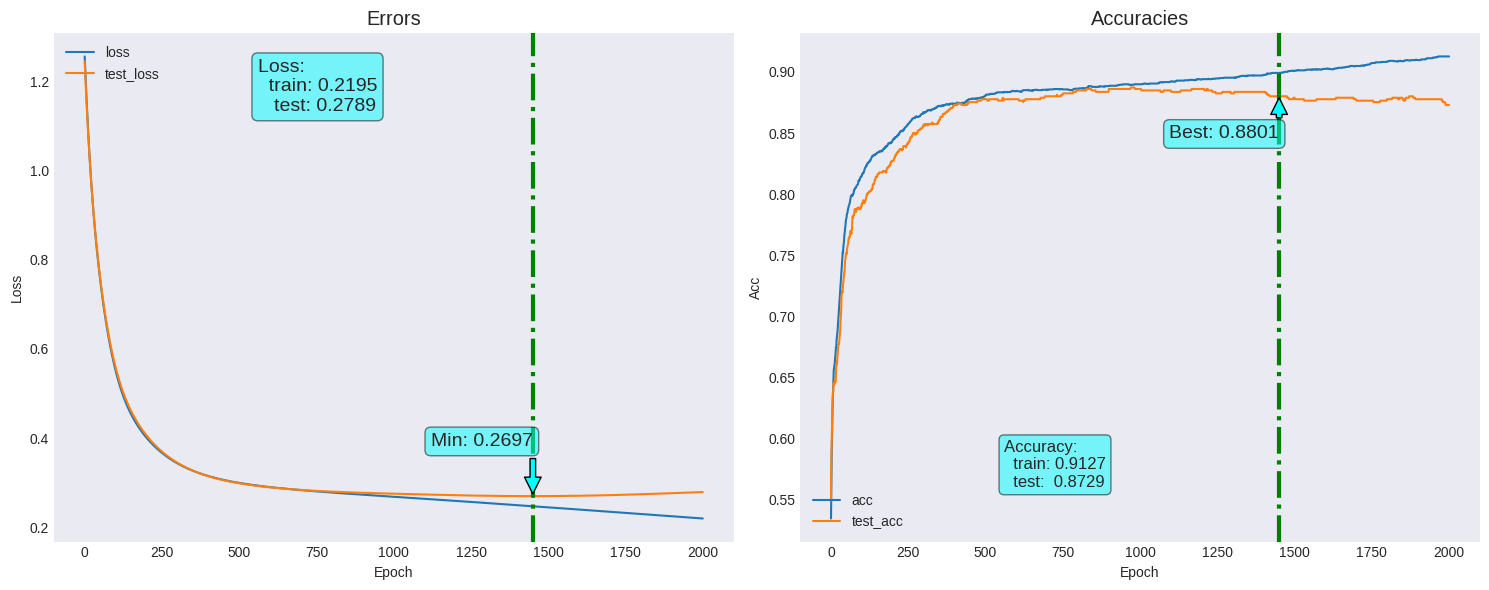

In [53]:
fn_plot_torch_hist(loss_df)

In [54]:
outputs = model(train_X)

y_pred = torch.argmax(outputs, dim = 1).cpu().numpy()

y_pred

array([1, 1, 1, ..., 2, 1, 1])

In [55]:
print(classification_report(train_y.cpu().numpy(), y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       0.95      0.95      0.95      1031
           2       0.88      0.91      0.89      1352
           3       0.88      0.82      0.85       649

    accuracy                           0.91      3334
   macro avg       0.93      0.92      0.92      3334
weighted avg       0.91      0.91      0.91      3334



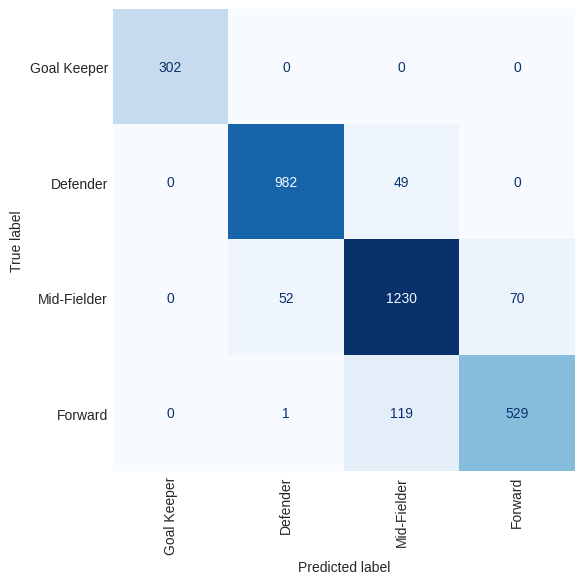

In [57]:
fn_plot_confusion_matrix(train_y.cpu().numpy(), y_pred, labels=labels)

In [63]:
torch.save(model, 'tensor.pt')